<div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

<hr><h1><center>Assignment 2 - Image Analysis using Numpy</center></h1>

<h3>Instructions </h3>
<p>In this assignment you will be using opencv to open an image and numpy to manipulate it. It is heavily recommended that you start with the exercises first and then do the assignment. </p>
<h3> 1. Setup </h3>
<p> Neccesary Libraries </p>

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen, Request

print("Importing finished")

Importing finished


<h3> 2. Image Analysis using Numpy</h3>
<p>Below we go with the web approach to loading a url, for the assignment please do not change this link as it will help with correcting as well as for your own sake so that you can compare your results to the expected output </p>

<h4> 2.1 Fetching an image via URL </h4>

In [2]:
def img_via_url():
    # Returns a Numpy Array with RGB colors
    URL = "https://upload.wikimedia.org/wikipedia/commons/0/02/Sea_Otter_%28Enhydra_lutris%29_%2825169790524%29_crop.jpg"
    HEADER = {'User-Agent': 'Mozilla/5.0'}
    
    # TODO: Fill out the withstatement below to fetch an image and make it a numpy array in RGB colors
    with urlopen(URL) as req:
        arr =  np.asarray(bytearray(req.read()), dtype=np.uint8)#TODO
        BGR_img = cv2.imdecode(arr, -1) #TODO
        
    RGB_img =  cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)#TODO
        
    return RGB_img

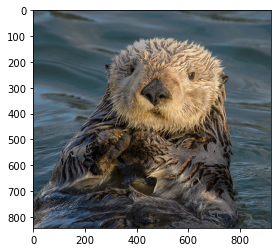

In [3]:
img = img_via_url()

# To show our img
plt.imshow(img)


Expected output:

<img src="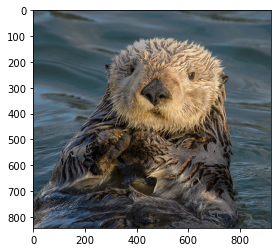
">

<h4>2.2 Copying, resizing and setting properties </h4>
<p>Create a copy of the original img and resize it to a 256x256 img, thereafter set the values of width and height</p>

In [4]:
def copy_and_process(img):
    """This function returns a resized img to 256x256 pixels, its height and its width"""
    img_copy = img.copy() #TODO
    resized_img = cv2.resize(img_copy, (256,256))#TODO Note; Resized the copied img, not the original
    height =  resized_img.shape[0]#TODO
    width =  resized_img.shape[1]#TODO
    return resized_img, height, width
    


In [5]:
# Try it out!
resized_img, height, width = copy_and_process(img)

print(f"Width of resized img: {width}, height of resized img: {height}")
print(f"First 4 columns in the first row: {resized_img[0][:4]}")

Width of resized img: 256, height of resized img: 256
First 4 columns in the first row: [[ 80  93 110]
 [ 83  97 114]
 [ 89 104 120]
 [ 84 101 116]]


Expected output:

<pre>Width of resized img: 256, height of resized img: 256
First 4 columns in the first row: [[ 80  93 110]
 [ 83  97 114]
 [ 89 104 120]
 [ 84 101 116]]
</pre>

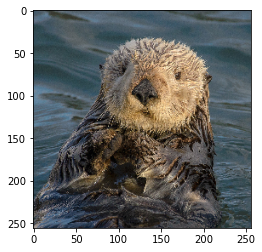

In [6]:
# Lets see how it looks
plt.imshow(resized_img)

Expected output: 

<img src="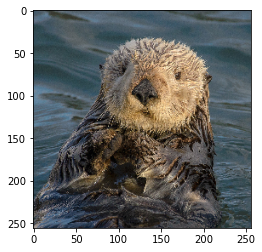
">

Great! Now we will get into the nitty and gritty and do some performance comparison of forloops vs numpy array

<h4>2.3 Modifying pixel values </h4>
<p>In the code below a two forloops are provided for accessing pixel values, your objective is to first get the current pixel values for a specified position and then check if the column value is greater than the height/2 (meaning we are halfway through the image vertically) and then if we are in the left half of the image we color it red. If we are on the right half of the image we color it green. Hint: in the if statements just described only modify them slightly, for example for the leftmost part it should be [255, prev_val[1], prev_val[2]]</p>

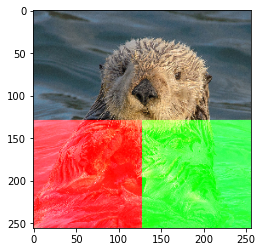

In [7]:
def set_pixel_values():
    # prev_val is a reference to a specific pixels value
    for row in range(width):
        for column in range(height):
            prev_val = resized_img[column][row]
            if column > height/2: #TODO:
                if row < width/2: #TODO:
                    resized_img[column][row] = [255, prev_val[1], prev_val[2]]#red
                else: 
                    resized_img[column][row] = [prev_val[0], 255, prev_val[2]]#green
            
set_pixel_values()
plt.imshow(resized_img)


Expected output: 
<img src="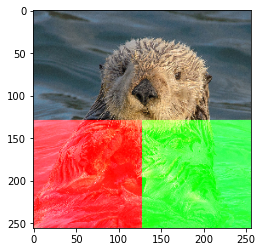
">

Great work! Now for the final part we are going to make this img into a one-dimensional column array

<h4>2.4 Flattening the image </h4>
<p>Reshape the img array into a twodimensional array with 1 column the rgb colors for each pixel. (This means that the first three rows in the array corresponds to one pictures pixel values). This is a technique widely used in machine learning where you usually process this type of arrays</p> 
<p>Hint: Use reshape like we did in the exercises! </p>

In [10]:
flattened_img =  resized_img.reshape(-1,1)#TODO
#flattened_img =  cv2.cvtColor(flattened_img, cv2.COLOR_BGR2RGB)

print(flattened_img.shape)
print(flattened_img)

(196608, 1)
[[ 80]
 [ 93]
 [110]
 ...
 [ 73]
 [255]
 [105]]


Expected output:
<pre>(196608, 1)
[[ 80]
 [ 93]
 [110]
 ...
 [ 73]
 [255]
 [105]]
</pre>

<h4>3. Closing remarks </h4>
<p>Well done! Next week we will start looking a bit more at datasets and learn how to use pandas to better understand our data. See you then! </p>

<h4> </h4>